In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 9.2 MB/s 


In [2]:
import pyupbit

In [3]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2021-10-25 18:00:00,76090000.0,76352000.0,76086000.0,76174000.0,222.571483,1.696291e+10
2021-10-25 19:00:00,76174000.0,76376000.0,75942000.0,76258000.0,301.727601,2.298625e+10
2021-10-25 20:00:00,76258000.0,76848000.0,76181000.0,76360000.0,485.075426,3.712127e+10
2021-10-25 21:00:00,76360000.0,76597000.0,76240000.0,76495000.0,247.165516,1.889557e+10
2021-10-25 22:00:00,76495000.0,77024000.0,76382000.0,76830000.0,645.418262,4.949847e+10
...,...,...,...,...,...,...
2021-11-02 21:00:00,74094000.0,74449000.0,74081000.0,74179000.0,292.854978,2.175976e+10
2021-11-02 22:00:00,74179000.0,74800000.0,74178000.0,74701000.0,394.852373,2.941436e+10
2021-11-02 23:00:00,74701000.0,75120000.0,74374000.0,74552000.0,446.214430,3.333157e+10
2021-11-03 00:00:00,74551000.0,75347000.0,74480000.0,75290000.0,380.905662,2.854074e+10


In [4]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-10-25 18:00:00,76174000.0
1,2021-10-25 19:00:00,76258000.0
2,2021-10-25 20:00:00,76360000.0
3,2021-10-25 21:00:00,76495000.0
4,2021-10-25 22:00:00,76830000.0
...,...,...
195,2021-11-02 21:00:00,74179000.0
196,2021-11-02 22:00:00,74701000.0
197,2021-11-02 23:00:00,74552000.0
198,2021-11-03 00:00:00,75290000.0


In [5]:
#prophet 불러옴
from fbprophet import Prophet

In [6]:
#학습
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [7]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

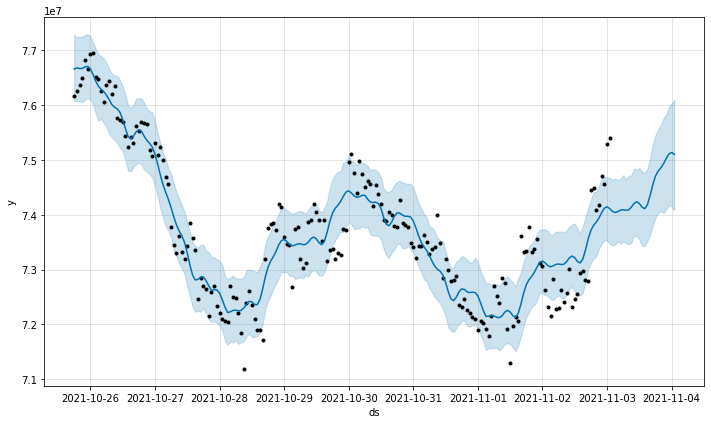

In [8]:
#그래프1
fig1 = model.plot(forecast)

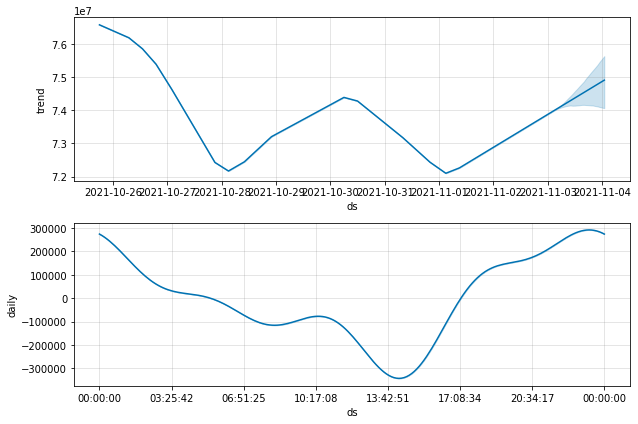

In [9]:
#그래프2
fig2 = model.plot_components(forecast)

In [10]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

75399000.0

In [11]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

74135856.2425046

In [12]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  75399000.0
종가의 가격:  74135856.2425046


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-23 06:00:00,7.480573e+07,7.436258e+07,7.533764e+07,7.480573e+07,7.480573e+07,22416.377195,22416.377195,22416.377195,22416.377195,22416.377195,22416.377195,0.0,0.0,0.0,7.482814e+07
1,2021-10-23 07:00:00,7.480522e+07,7.419331e+07,7.521262e+07,7.480522e+07,7.480522e+07,-98633.883594,-98633.883594,-98633.883594,-98633.883594,-98633.883594,-98633.883594,0.0,0.0,0.0,7.470658e+07
2,2021-10-23 08:00:00,7.480471e+07,7.418427e+07,7.516275e+07,7.480471e+07,7.480471e+07,-131651.208553,-131651.208553,-131651.208553,-131651.208553,-131651.208553,-131651.208553,0.0,0.0,0.0,7.467306e+07
3,2021-10-23 09:00:00,7.480420e+07,7.427580e+07,7.523727e+07,7.480420e+07,7.480420e+07,-52697.334393,-52697.334393,-52697.334393,-52697.334393,-52697.334393,-52697.334393,0.0,0.0,0.0,7.475151e+07
4,2021-10-23 10:00:00,7.480370e+07,7.438877e+07,7.535000e+07,7.480370e+07,7.480370e+07,69138.449047,69138.449047,69138.449047,69138.449047,69138.449047,69138.449047,0.0,0.0,0.0,7.487283e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-11-01 09:00:00,7.297159e+07,7.205973e+07,7.376674e+07,7.226030e+07,7.374409e+07,-52697.334390,-52697.334390,-52697.334390,-52697.334390,-52697.334390,-52697.334390,0.0,0.0,0.0,7.291889e+07
220,2021-11-01 10:00:00,7.295066e+07,7.207955e+07,7.400584e+07,7.217790e+07,7.377859e+07,69138.449048,69138.449048,69138.449048,69138.449048,69138.449048,69138.449048,0.0,0.0,0.0,7.301980e+07
221,2021-11-01 11:00:00,7.292974e+07,7.213834e+07,7.401107e+07,7.209524e+07,7.382441e+07,125437.867568,125437.867568,125437.867568,125437.867568,125437.867568,125437.867568,0.0,0.0,0.0,7.305517e+07
222,2021-11-01 12:00:00,7.290881e+07,7.196112e+07,7.403035e+07,7.202939e+07,7.387842e+07,57873.895007,57873.895007,57873.895007,57873.895007,57873.895007,57873.895007,0.0,0.0,0.0,7.296668e+07
